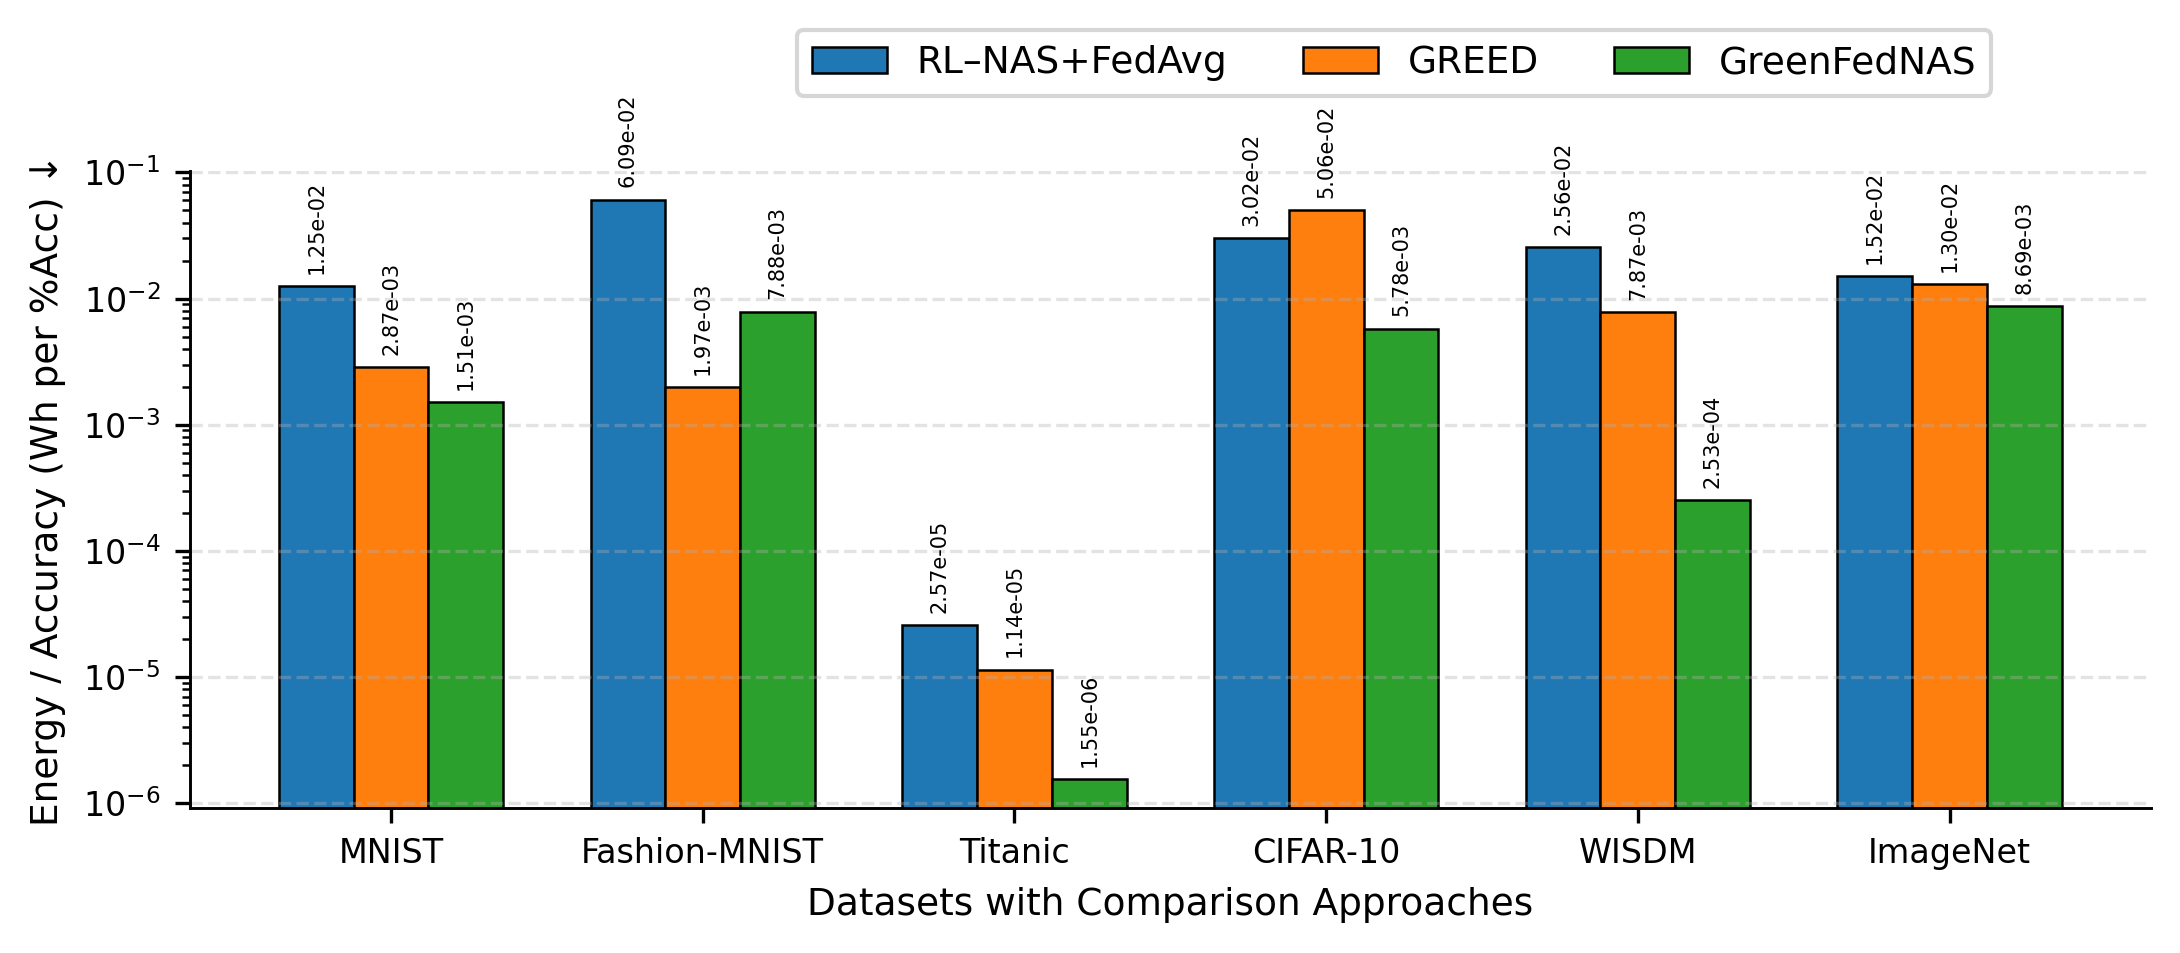

Saved: /content/eer_grouped_log.png


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ---------------------------
# ACM-STYLE VISUAL SETTINGS
# ---------------------------
rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "axes.linewidth": 0.7,
    "axes.labelsize": 9,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.color":"black",
    "grid.alpha": 0.35,
    "grid.linestyle": "--",
    "figure.dpi": 300,
})

# ---------------------------------------------------------
# FIXED + ALIGNED DATA (matches: RL–NAS+FedAvg, GREED, GreenFedNAS)
# ---------------------------------------------------------
datasets = ["MNIST", "Fashion-MNIST", "Titanic", "CIFAR-10", "WISDM", "ImageNet"]

methods = ["RL–NAS+FedAvg", "GREED", "GreenFedNAS"]

# Your raw numbers (re-ordered to match methods above for each dataset)
energy_wh = np.array([
    [0.823,   0.176,   0.1289],     # MNIST
    [3.3093,  0.1199,  0.5281],      # Fashion-MNIST # Added comma here
    [0.0015,  0.000721,0.000139],   # Titanic
    [1.85,    2.9571,  0.454],      # CIFAR-10
    [1.53,    0.51,    0.021],      # WISDM
    [0.7892,  0.7314,  0.5215],     # ImageNet
], dtype=float)

accuracy = np.array([
    [66.02,  61.33,  85.22],  # MNIST
    [54.32,  60.78,  67.01],  # Fashion-MNIST
    [58.41,  63.04,  89.78],  # Titanic
    [61.33,  58.39,  78.56],  # CIFAR-10
    [59.88,  64.84,  83.06],  # WISDM
    [52.00,  56.06,  60.00],  # ImageNet
], dtype=float)

eer = energy_wh / accuracy  # Wh per %Acc

# ---------------------------------------------------------
# PLOT: GROUPED BAR (log-scale) + value labels
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(7.4, 3.4))

x = np.arange(len(datasets))
w = 0.24

# Keep default matplotlib colors (no manual hex) but make methods consistent
bars1 = ax.bar(x - w, eer[:, 0], width=w, edgecolor="black", linewidth=0.6, label=methods[0])
bars2 = ax.bar(x,     eer[:, 1], width=w, edgecolor="black", linewidth=0.6, label=methods[1])
bars3 = ax.bar(x + w, eer[:, 2], width=w, edgecolor="black", linewidth=0.6, label=methods[2])

ax.set_yscale("log")
ax.set_ylabel("Energy / Accuracy (Wh per %Acc) ↓")
ax.set_xlabel("Datasets with Comparison Approaches")
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.grid(axis="y")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add compact annotations (scientific notation)
def annotate(bars):
    for b in bars:
        v = b.get_height()
        ax.text(
            b.get_x() + b.get_width()/2,
            v * 1.25,                 # slightly above bar (works well on log axis)
            f"{v:.2e}",
            ha="center",
            va="bottom",
            fontsize=5,
            rotation=90
        )

annotate(bars1); annotate(bars2); annotate(bars3)

ax.legend(frameon=True, fontsize=9, ncol=3, loc="upper left", bbox_to_anchor=(0.3, 1.25))
#ax.set_title("Energy Efficiency Ratio")

plt.tight_layout()
plt.savefig("/content/eer_grouped_log.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: /content/eer_grouped_log.png")